In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [16]:
votes = pd.read_json('votes.json', orient='table')
games = pd.read_json('games.json', orient='table')
users = pd.read_json('users.json', orient='table')


In [17]:
votes


,id,game_id,voting_round,email,vote,accepted
0,1,1,0,h1810014@nushigh.edu.sg,d4,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True
3,5,1,2,h1930005@nushigh.edu.sg,d5,False
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True
...,...,...,...,...,...,...
9354,9375,50,0,h2010107@nushigh.edu.sg,e4,True
9355,9376,50,0,h2010155@nushigh.edu.sg,e4,True
9356,9379,51,0,h2010094@nushigh.edu.sg,e4,True
9357,9378,51,0,h2010107@nushigh.edu.sg,e4,True


In [33]:
games

,white_team,winner,timeout
id,,,
1,1,2,True
2,2,-1,False
3,1,2,False
4,2,-1,False
5,1,1,False
6,2,1,False
7,1,1,False
8,2,2,False
9,1,2,False


In [34]:
users

,email,username,team
0,h1710074@nushigh.edu.sg,LAM JUN RONG,1
1,h1710051@nushigh.edu.sg,JAVIER LIM,1
2,h1810014@nushigh.edu.sg,CERVON WONG TENG HAO,1
3,h2010143@nushigh.edu.sg,"TAN YOU JUN, EUGENE",2
4,h1810136@nushigh.edu.sg,SEOW WEI RONG DANIEL,2
...,...,...,...
143,h2210002@nushigh.edu.sg,ADVITEEYA KRISHNA,1
144,h2210166@nushigh.edu.sg,YAP KIEN HONG (YE JIANFENG),2
145,h1710098@nushigh.edu.sg,"NAM POH CHUAN, CHARLES",2
146,h2210015@nushigh.edu.sg,"BOH TZE EN, BRAYAN",1


In [26]:
games6 = games.loc[:29]


In [27]:
games6


,white_team,winner,timeout
id,,,
1,1,2,True
2,2,-1,False
3,1,2,False
4,2,-1,False
5,1,1,False
6,2,1,False
7,1,1,False
8,2,2,False
9,1,2,False


In [35]:
votes6 = votes[votes.game_id.isin(games6.index.tolist())]
votes6


,id,game_id,voting_round,email,vote,accepted
0,1,1,0,h1810014@nushigh.edu.sg,d4,True
1,2,1,1,h2010143@nushigh.edu.sg,Nf6,False
2,3,1,1,h1810136@nushigh.edu.sg,e5,True
3,5,1,2,h1930005@nushigh.edu.sg,d5,False
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True
...,...,...,...,...,...,...
7855,7870,29,1,h1910089@nushigh.edu.sg,e5,True
7856,7874,29,2,h1710149@nushigh.edu.sg,Nf3,True
7857,7872,29,2,h2010094@nushigh.edu.sg,Nf3,True
7858,7871,29,2,h2010107@nushigh.edu.sg,Nf3,True


In [31]:
len(votes6) * 20 / 60 / 60


43.62777777777777

In [32]:
len(users)


148

In [37]:
len(users[users.email.isin(votes6.email)])


130

In [102]:
v6a = votes6[votes6.accepted]


def get_team(email):
    return users[users.email == email].team.iloc[0]

def get_name(email):
    return users[users.email == email].username.iloc[0]

def get_winner(game_id):
    return games.loc[game_id].winner


v6a.loc[:, 'team'] = v6a.email.apply(get_team)
v6a.loc[:, 'winner'] = v6a.game_id.apply(get_winner)

v6a

C:\Users\billi\AppData\Local\Temp\ipykernel_160\856032100.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v6a.loc[:, 'team'] = v6a.email.apply(get_team)
C:\Users\billi\AppData\Local\Temp\ipykernel_160\856032100.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v6a.loc[:, 'winner'] = v6a.game_id.apply(get_winner)


,id,game_id,voting_round,email,vote,accepted,team,winner
0,1,1,0,h1810014@nushigh.edu.sg,d4,True,1,2
2,3,1,1,h1810136@nushigh.edu.sg,e5,True,2,2
4,4,1,2,h1810014@nushigh.edu.sg,dxe5,True,1,2
6,6,1,3,h1810136@nushigh.edu.sg,Bc5,True,2,2
7,8,1,4,h1810014@nushigh.edu.sg,Nf3,True,1,2
...,...,...,...,...,...,...,...,...
7855,7870,29,1,h1910089@nushigh.edu.sg,e5,True,1,2
7856,7874,29,2,h1710149@nushigh.edu.sg,Nf3,True,2,2
7857,7872,29,2,h2010094@nushigh.edu.sg,Nf3,True,2,2
7858,7871,29,2,h2010107@nushigh.edu.sg,Nf3,True,2,2


In [116]:
top10 = set()

for i in range(1, 29):
    top = v6a[(v6a.team == v6a.winner) & (v6a.game_id <= i)].email.value_counts()
    [top10.add(x) for x in list(top.index)[:3]]

top10

{'h1710133@nushigh.edu.sg',
 'h1810136@nushigh.edu.sg',
 'h1810141@nushigh.edu.sg',
 'h1810152@nushigh.edu.sg',
 'h1910014@nushigh.edu.sg',
 'h1910070@nushigh.edu.sg',
 'h1910089@nushigh.edu.sg',
 'h1910115@nushigh.edu.sg',
 'h2010071@nushigh.edu.sg',
 'h2010143@nushigh.edu.sg',
 'h2010155@nushigh.edu.sg',
 'h2110092@nushigh.edu.sg'}

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.19607843e-01 2.79582593e-01 9.89980213e-01 1.00000000e+00]
 [1.39215686e-01 5.36866598e-01 9.60121645e-01 1.00000000e+00]
 [4.11764706e-02 7.51331890e-01 9.11022649e-01 1.00000000e+00]
 [2.29411765e-01 9.11022649e-01 8.40344072e-01 1.00000000e+00]
 [4.09803922e-01 9.89980213e-01 7.55382735e-01 1.00000000e+00]
 [5.90196078e-01 9.89980213e-01 6.55283850e-01 1.00000000e+00]
 [7.70588235e-01 9.11022649e-01 5.42053356e-01 1.00000000e+00]
 [9.58823529e-01 7.51331890e-01 4.12356317e-01 1.00000000e+00]
 [1.00000000e+00 5.36866598e-01 2.79582593e-01 1.00000000e+00]
 [1.00000000e+00 2.79582593e-01 1.41206152e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


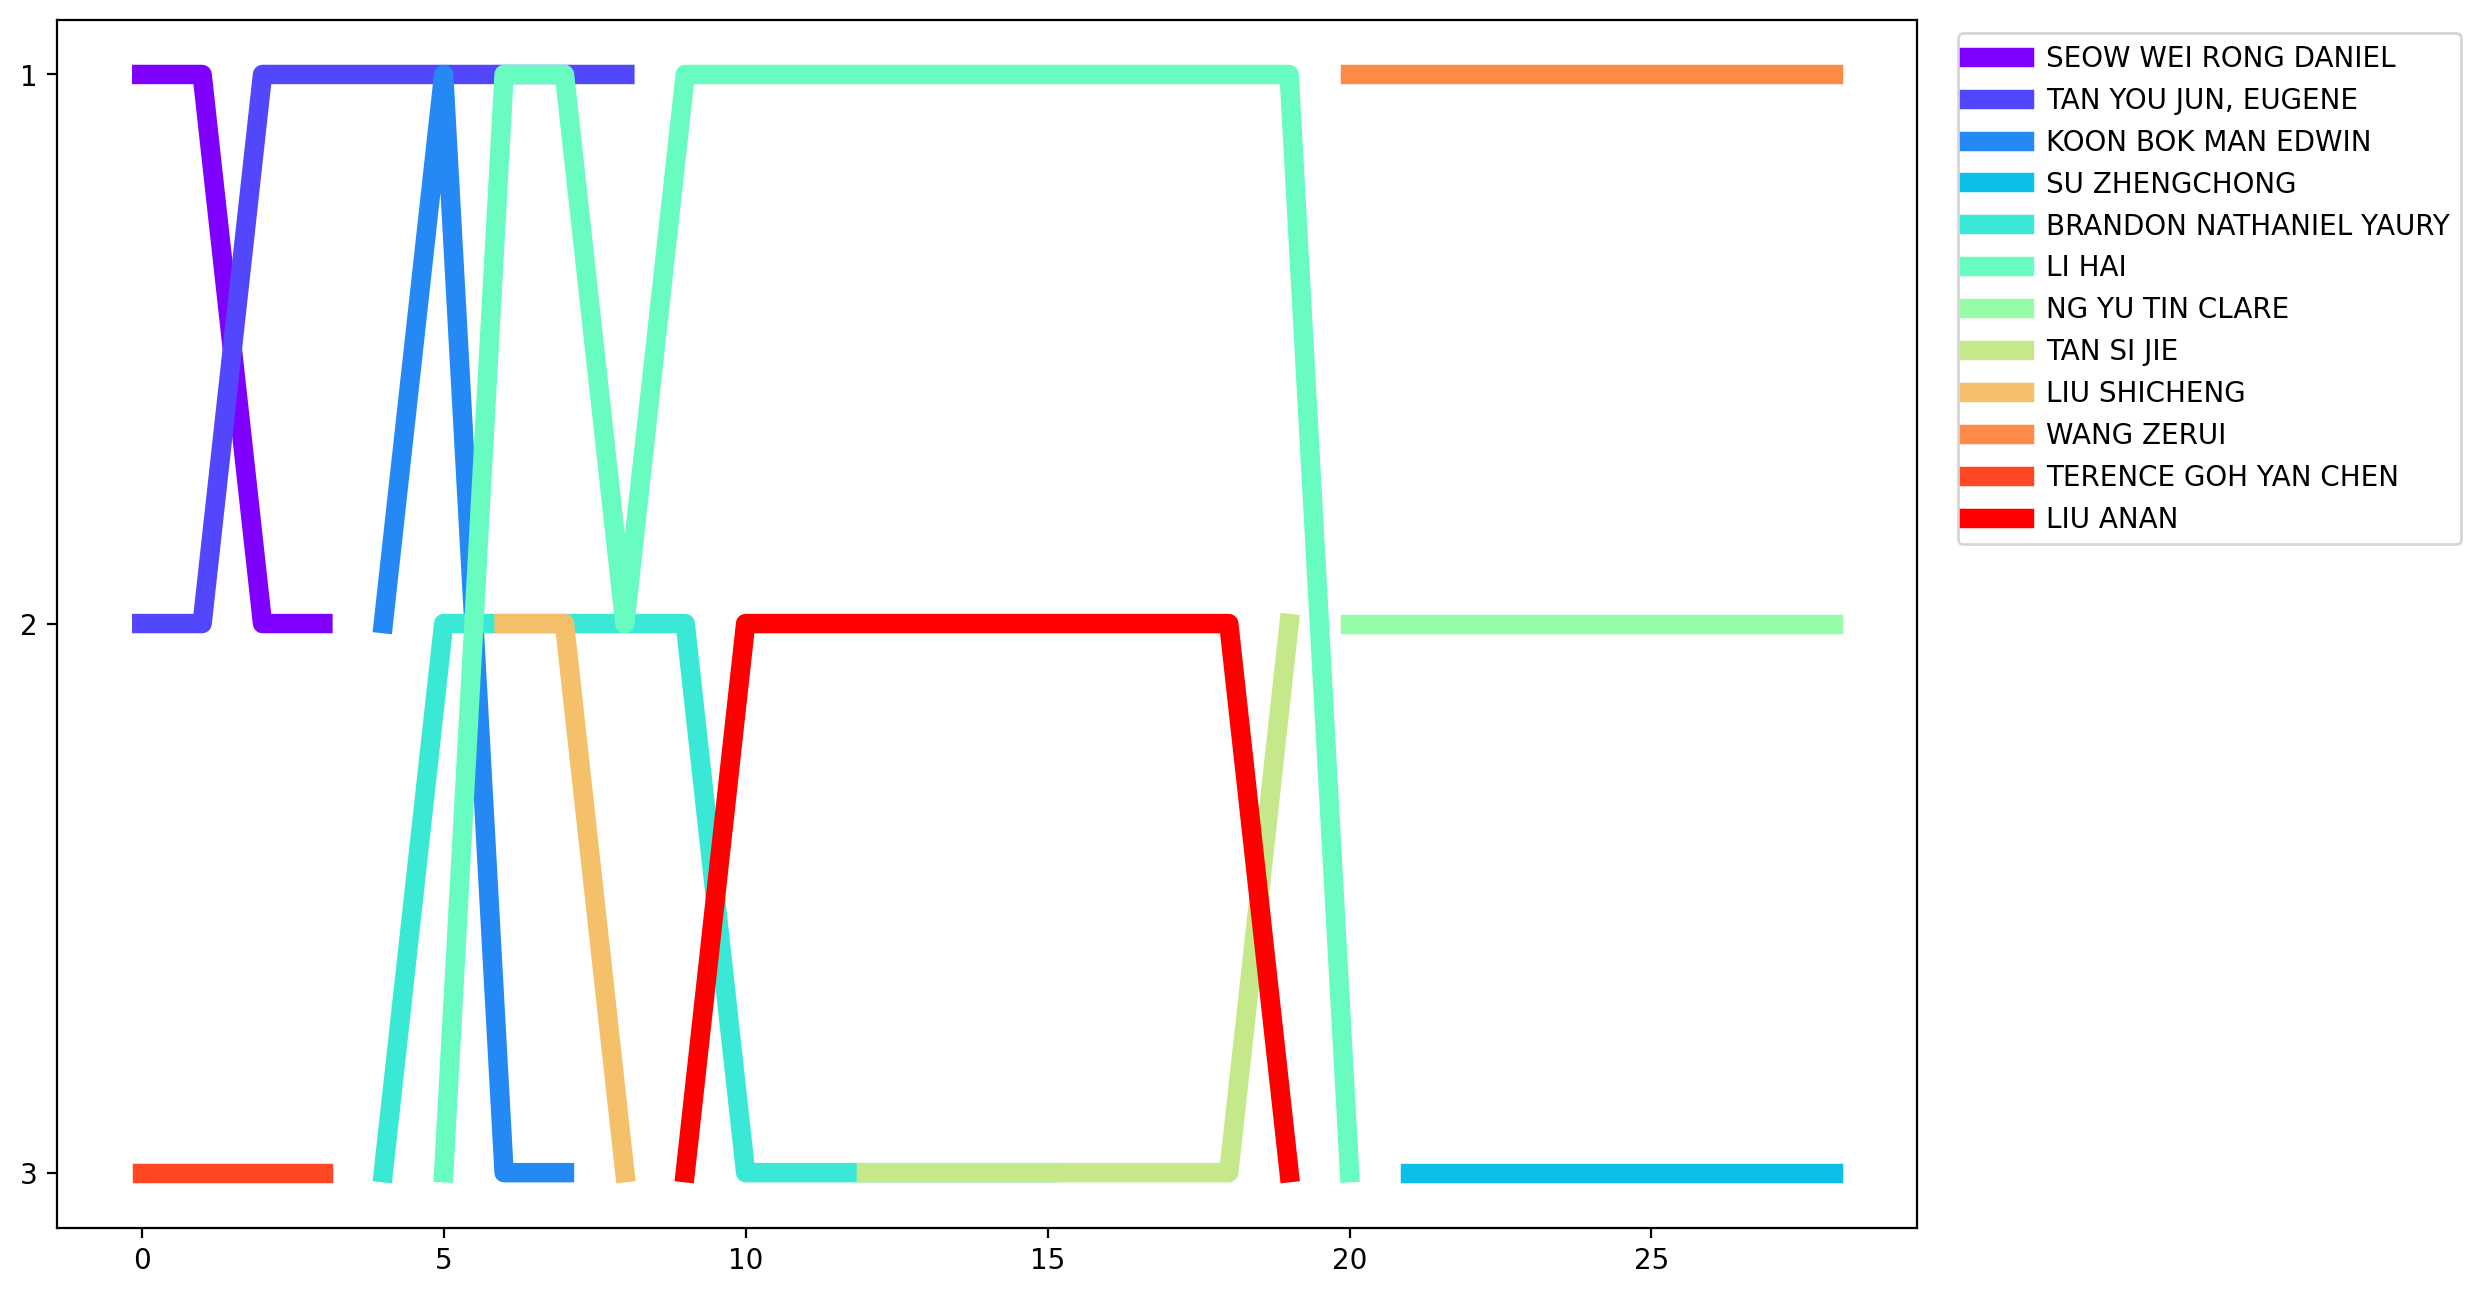

In [153]:
 # given email, find list of their placings
def get_placings(email):
    lst = []
    for i in range(1, 30):
        curr_board = list(v6a[(v6a.team == v6a.winner) & (v6a.game_id <= i)].email.value_counts().index)
        if email in curr_board:
            placing = curr_board.index(email)
            if placing >= 3:
                lst.append(-1)
            else:
                lst.append(placing)
        else:
            lst.append(-1)
    return lst


plt.figure(figsize=(12, 8), dpi=200)
colors = cm.rainbow(np.linspace(0, 1, len(top10)))
print(colors)
df = pd.DataFrame()
for i, email in enumerate(top10):
    placings = get_placings(email)
    df[email] = placings

    x = []
    y = []

    for j, p in enumerate(placings):
        if p != -1:
            x.append(j)
            y.append(p + 1)
    line, = plt.plot(x, y, color=colors[i], linewidth=7)
    line.set_label(get_name(email))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.gca().invert_yaxis()
plt.gca().yaxis.get_major_locator().set_params(integer=True)

plt.savefig('placings.png', bbox_inches='tight', facecolor='white')

In [134]:
list(enumerate(top10))

[(0, 'h1810136@nushigh.edu.sg'),
 (1, 'h2010143@nushigh.edu.sg'),
 (2, 'h1910070@nushigh.edu.sg'),
 (3, 'h1810141@nushigh.edu.sg'),
 (4, 'h1910014@nushigh.edu.sg'),
 (5, 'h2010071@nushigh.edu.sg'),
 (6, 'h1910115@nushigh.edu.sg'),
 (7, 'h1710133@nushigh.edu.sg'),
 (8, 'h2110092@nushigh.edu.sg'),
 (9, 'h2010155@nushigh.edu.sg'),
 (10, 'h1810152@nushigh.edu.sg'),
 (11, 'h1910089@nushigh.edu.sg')]

In [77]:
list(v6a[(v6a.team == v6a.winner)].email.value_counts().index).index('h2010155@nushigh.edu.sg')


0

In [76]:
v6a[(v6a.team == v6a.winner)].email.value_counts()


h2010155@nushigh.edu.sg    267
h1910115@nushigh.edu.sg    209
h1810141@nushigh.edu.sg    203
h2010071@nushigh.edu.sg    163
h1710133@nushigh.edu.sg    157
                          ... 
h1710126@nushigh.edu.sg      1
h1930013@nushigh.edu.sg      1
h1910154@nushigh.edu.sg      1
h1910010@nushigh.edu.sg      1
h2110040@nushigh.edu.sg      1
Name: email, Length: 75, dtype: int64